# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
df = pd.read_csv("Airline Passenger Satisfaction.csv").set_index('id').drop(columns=['Unnamed: 0'])
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18,neutral or dissatisfied,7
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6,neutral or dissatisfied,3
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0,satisfied,9
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9,neutral or dissatisfied,6
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0,satisfied,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,3,2,4,4,5,4,0,0,neutral or dissatisfied,5
71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,5,5,5,5,4,0,0,satisfied,9
37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,4,3,4,5,4,2,0,0,neutral or dissatisfied,5


As "satisfaction" does not differentiate between neutral and dissatisfied, we will create another column to make that distinction, using the given criteria of:

0-6: Dissatisfied
7-8: Neutral
9-10: Satisfied

In [3]:
df['satisfaction_3'] = df['satisfaction score'].apply(lambda x: 'satisfied' if x > 8 else 'neutral' if 6 < x <= 8 else 'dissatisfied')
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score,satisfaction_3
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,4,4,5,5,25,18,neutral or dissatisfied,7,neutral
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,5,3,1,4,1,1,6,neutral or dissatisfied,3,dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,3,4,4,4,5,0,0,satisfied,9,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,5,3,1,4,2,11,9,neutral or dissatisfied,6,dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,4,3,3,3,0,0,satisfied,10,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,2,4,4,5,4,0,0,neutral or dissatisfied,5,dissatisfied
71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,5,5,5,5,4,0,0,satisfied,9,satisfied
37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,3,4,5,4,2,0,0,neutral or dissatisfied,5,dissatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 70172 to 34799
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             129880 non-null  object
 1   Customer Type                      129880 non-null  object
 2   Age                                129880 non-null  int64 
 3   Type of Travel                     129880 non-null  object
 4   Class                              129880 non-null  object
 5   Flight Distance                    129880 non-null  int64 
 6   Inflight wifi service              129880 non-null  int64 
 7   Departure/Arrival time convenient  129880 non-null  int64 
 8   Ease of Online booking             129880 non-null  int64 
 9   Gate location                      129880 non-null  int64 
 10  Food and drink                     129880 non-null  int64 
 11  Online boarding                    129880 non-nul

Columns 7 to 20 are ordinal data from 0 to 5 each. Column 24 contains ordinal data from 0 to 10. 

In [5]:
df_categorical_vars = df.select_dtypes(include=['object', 'category'])

print("Categorical Variables:")
print(df_categorical_vars.columns.tolist())

print("\n")

for col in df_categorical_vars.columns.tolist():
    print(col)
    print(df_categorical_vars[col].unique())

df_categorical_vars['satisfaction score'] = df['satisfaction score']

df_categorical_vars

Categorical Variables:
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'satisfaction_3']


Gender
['Male' 'Female']
Customer Type
['Loyal Customer' 'disloyal Customer']
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco Plus' 'Business' 'Eco']
satisfaction
['neutral or dissatisfied' 'satisfied']
satisfaction_3
['neutral' 'dissatisfied' 'satisfied']


,Gender,Customer Type,Type of Travel,Class,satisfaction,satisfaction_3,satisfaction score
id,,,,,,,
70172,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,neutral,7
5047,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,dissatisfied,3
110028,Female,Loyal Customer,Business travel,Business,satisfied,satisfied,9
24026,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,dissatisfied,6
119299,Male,Loyal Customer,Business travel,Business,satisfied,satisfied,10
...,...,...,...,...,...,...,...
78463,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,dissatisfied,5
71167,Male,Loyal Customer,Business travel,Business,satisfied,satisfied,9
37675,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,dissatisfied,5


In [6]:
df_numeric_vars = df.select_dtypes(include=['int64'])

print("Numeric Variables: \n")

for col in df_numeric_vars.columns.tolist():
    print(col)

df_numeric_vars

Numeric Variables: 

Age
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction score


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction score
id,,,,,,,,,,,,,,,,,,,
70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,7
5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,3
110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,9
24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,6
119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0,5
71167,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0,9
37675,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0,5


# Checking for null values

In [7]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
satisfaction score                   0
satisfaction_3                       0
dtype: int64

Since there are no null values, we may carry on to the next step.

# EDA

### Frequency plot

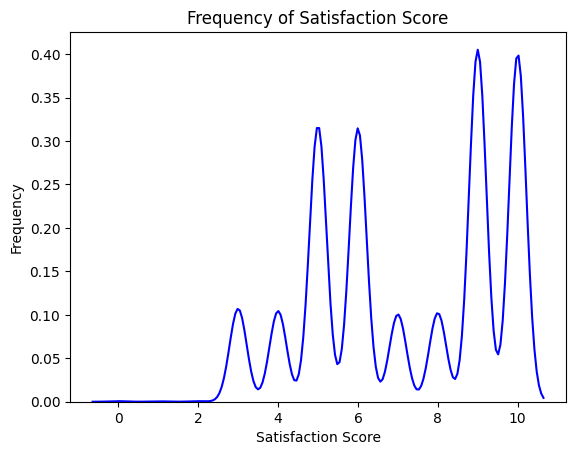

In [8]:
sns.kdeplot(df['satisfaction score'], color = 'blue')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Frequency of Satisfaction Score')

plt.show()

Satisfaction score skews towards the higher end. 

### Correlation plot (heatmap)

<Axes: >

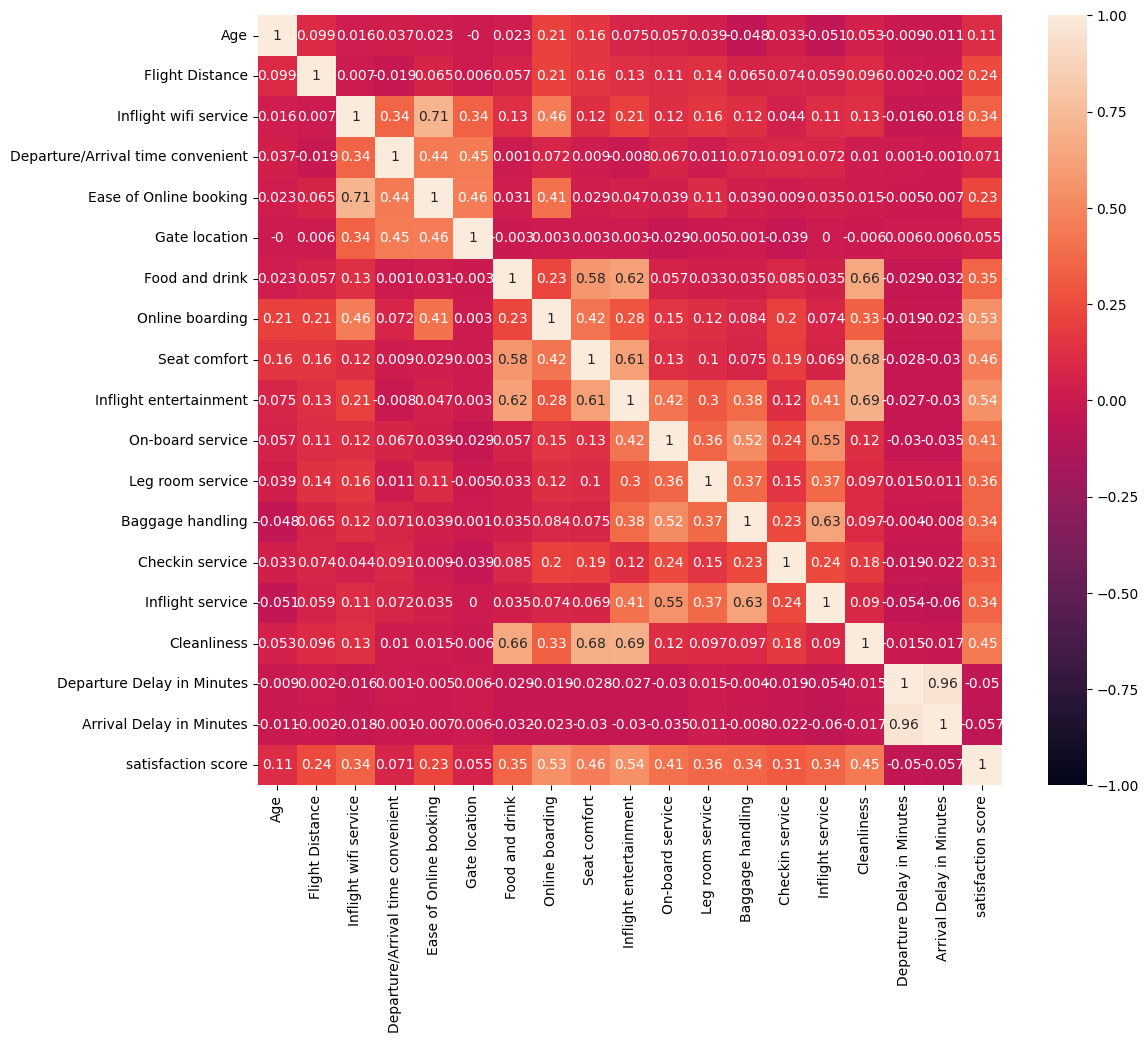

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df_numeric_vars.corr().round(3), vmin=-1, vmax=1, annot=True)

The variables with correlation coefficient > 0.3 include:

Inflight wifi service,
Food and drink,
Online boarding,
Seat comfort,
Inflight entertainment,
On-board service,
Leg room service,
Baggage handling,
Checkin service,
Inflight service,
Cleaniness.

The variables with some degree of collinearity include:

Cleaniness - Food and Drink.
Cleaniness - Seat comfort.
Cleaniness - Inflight entertainment.
Inflight service - On-board service.
Inflight service - Baggage handling.
Baggage handling - On-board service.
Inflight entertainment - Food and Drink.
Inflight entertainment - Seat comfort.
Ease of Online Booking - Inflight wifi service.

### Box plot

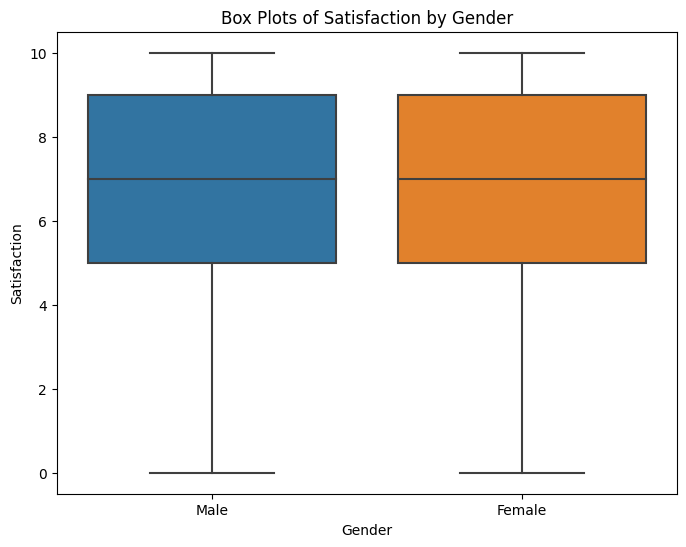

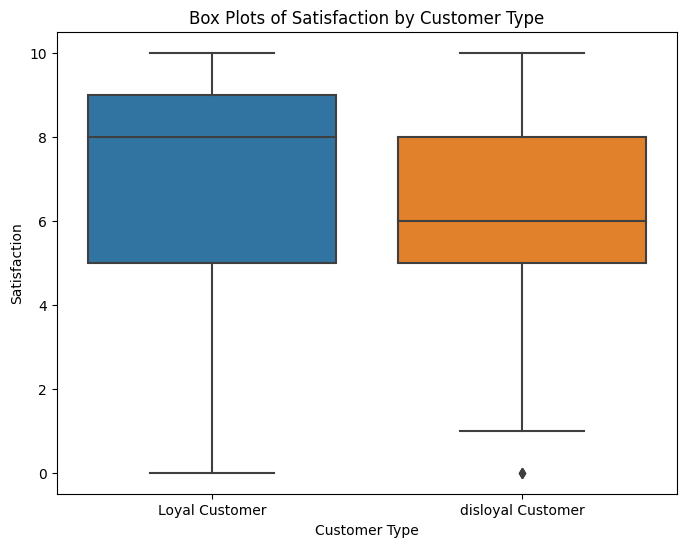

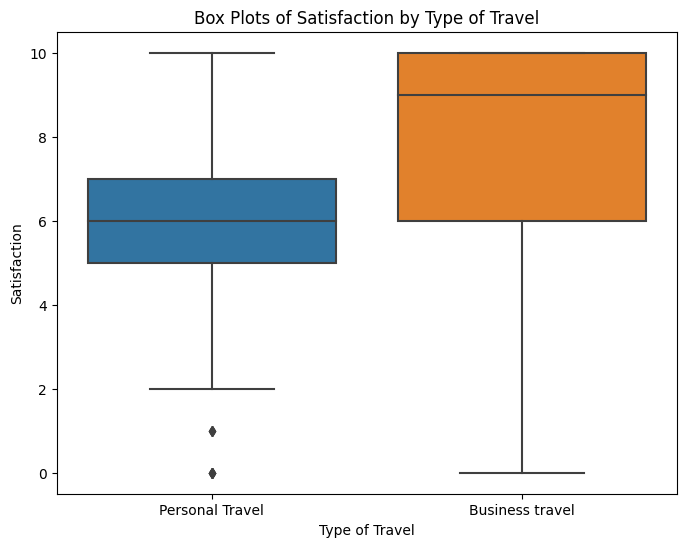

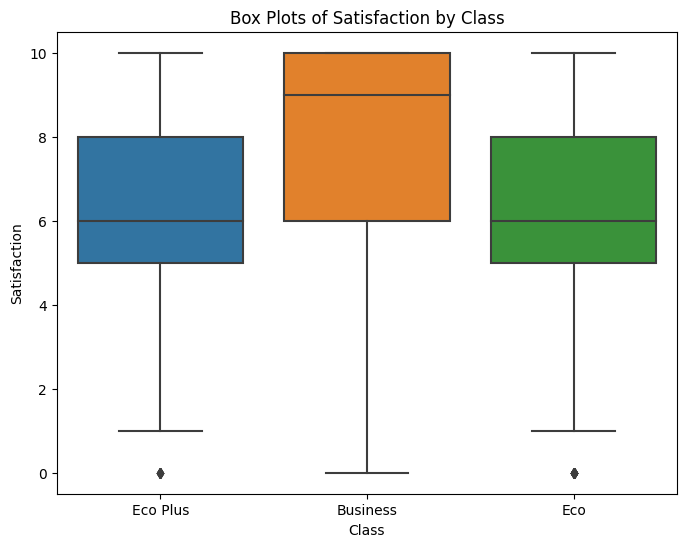

In [10]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Gender', y = 'satisfaction score', data = df_categorical_vars)
plt.xlabel('Gender')
plt.ylabel('Satisfaction')
plt.title('Box Plots of Satisfaction by Gender')
plt.show()

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Customer Type', y = 'satisfaction score', data = df_categorical_vars)
plt.xlabel('Customer Type')
plt.ylabel('Satisfaction')
plt.title('Box Plots of Satisfaction by Customer Type')
plt.show()

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Type of Travel', y = 'satisfaction score', data = df_categorical_vars)
plt.xlabel('Type of Travel')
plt.ylabel('Satisfaction')
plt.title('Box Plots of Satisfaction by Type of Travel')
plt.show()

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Class', y = 'satisfaction score', data = df_categorical_vars)
plt.xlabel('Class')
plt.ylabel('Satisfaction')
plt.title('Box Plots of Satisfaction by Class')
plt.show()

### Confusion matrix

In [11]:
for col in df_categorical_vars.columns.tolist():
    if col not in ['satisfaction', 'satisfaction_3', 'satisfaction score']:
        print(pd.crosstab(df_categorical_vars[col], df_categorical_vars['satisfaction_3']))
        print("\n")

satisfaction_3  dissatisfied  neutral  satisfied
Gender                                          
Female                 30382     7248      28269
Male                   28864     6958      28159


satisfaction_3     dissatisfied  neutral  satisfied
Customer Type                                      
Loyal Customer            44274    11098      50728
disloyal Customer         14972     3108       5700


satisfaction_3   dissatisfied  neutral  satisfied
Type of Travel                                   
Business travel         32685     4652      52356
Personal Travel         26561     9554       4072


satisfaction_3  dissatisfied  neutral  satisfied
Class                                           
Business               16001     2993      43166
Eco                    37515     9851      10943
Eco Plus                5730     1362       2319




The gender of the traveller tends to have little effect on the overall satisfaction level.

Customer type (loyalty) has some effect.

Type of travel has some effect on the satisfaction level.

Business class travellers tend to be more satisfied than Economy and Economy Plus travellers.

### 100% Stacked bar graphs

In [12]:
# List of ordinal columns
ordinal_columns = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

#### 2 Outcomes

satisfaction           neutral or dissatisfied  satisfied
Inflight wifi service                                    
0                                     0.255363  99.744637
1                                    67.180222  32.819778
2                                    75.278465  24.721535
3                                    74.817462  25.182538
4                                    39.923310  60.076690
5                                     0.982168  99.017832


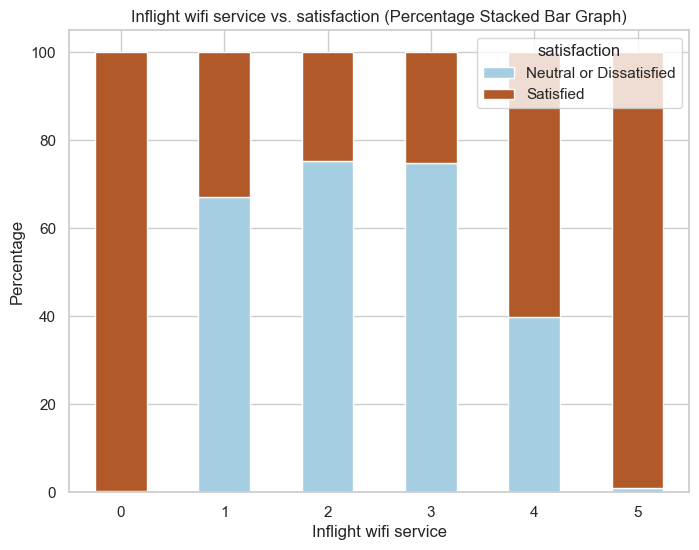

satisfaction                       neutral or dissatisfied  satisfied
Departure/Arrival time convenient                                    
0                                                51.893429  48.106571
1                                                50.960894  49.039106
2                                                55.526145  44.473855
3                                                56.032711  43.967289
4                                                61.138645  38.861355
5                                                57.529109  42.470891


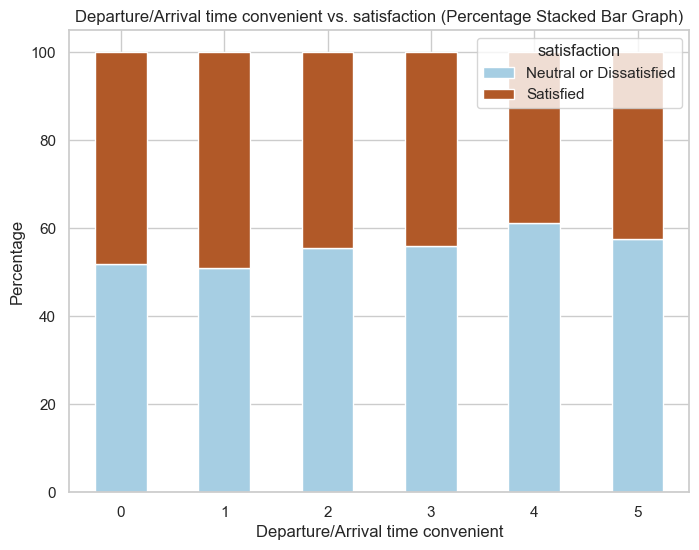

satisfaction            neutral or dissatisfied  satisfied
Ease of Online booking                                    
0                                     33.438930  66.561070
1                                     62.053367  37.946633
2                                     69.651592  30.348408
3                                     68.989570  31.010430
4                                     46.837670  53.162330
5                                     26.532369  73.467631


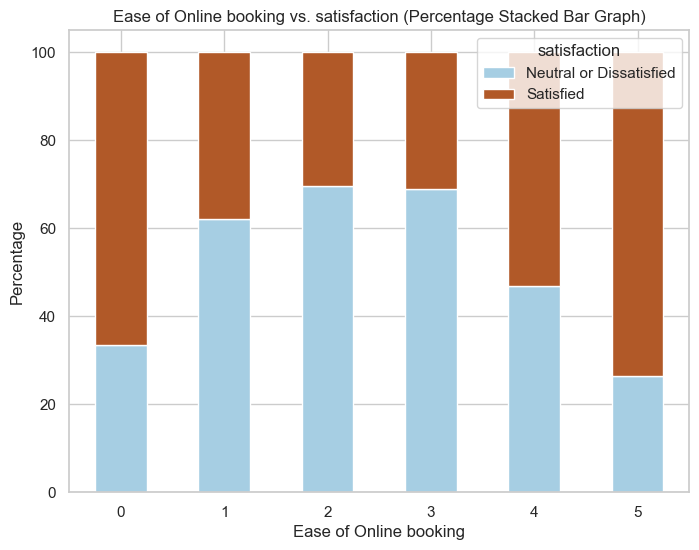

satisfaction   neutral or dissatisfied   satisfied
Gate location                                     
0                                  NaN  100.000000
1                            50.111409   49.888591
2                            53.621995   46.378005
3                            65.293838   34.706162
4                            60.930217   39.069783
5                            43.196048   56.803952


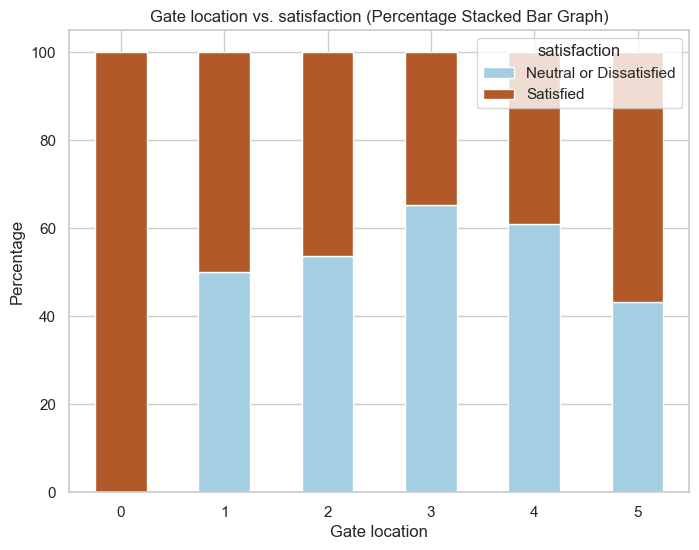

satisfaction    neutral or dissatisfied  satisfied
Food and drink                                    
0                             58.333333  41.666667
1                             80.044857  19.955143
2                             61.099953  38.900047
3                             60.257610  39.742390
4                             47.416811  52.583189
5                             44.911829  55.088171


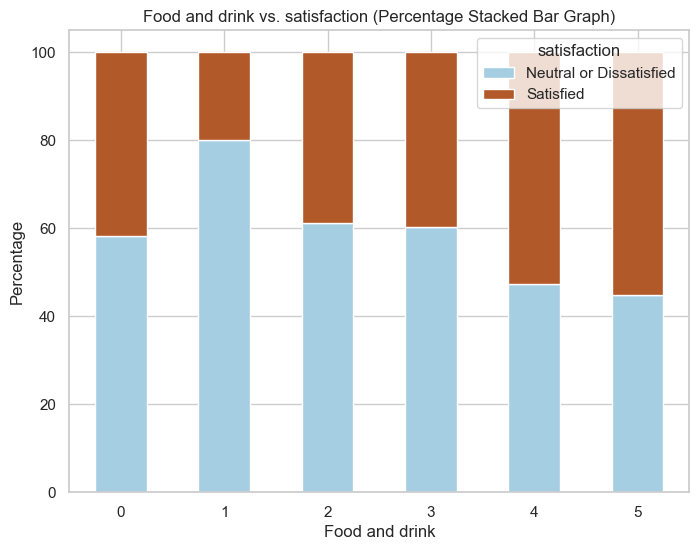

satisfaction     neutral or dissatisfied  satisfied
Online boarding                                    
0                              43.538961  56.461039
1                              86.222758  13.777242
2                              88.547461  11.452539
3                              86.237416  13.762584
4                              37.698867  62.301133
5                              12.943889  87.056111


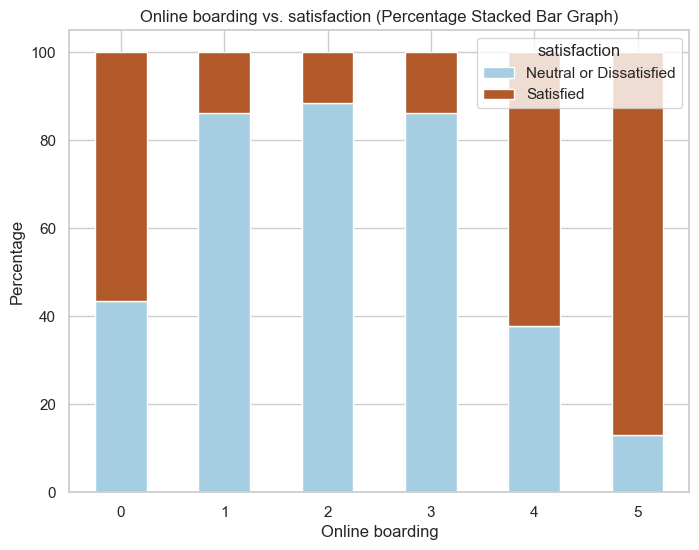

satisfaction  neutral or dissatisfied  satisfied
Seat comfort                                    
0                          100.000000        NaN
1                           77.667461  22.332539
2                           77.397593  22.602407
3                           78.592250  21.407750
4                           43.970721  56.029279
5                           34.866397  65.133603


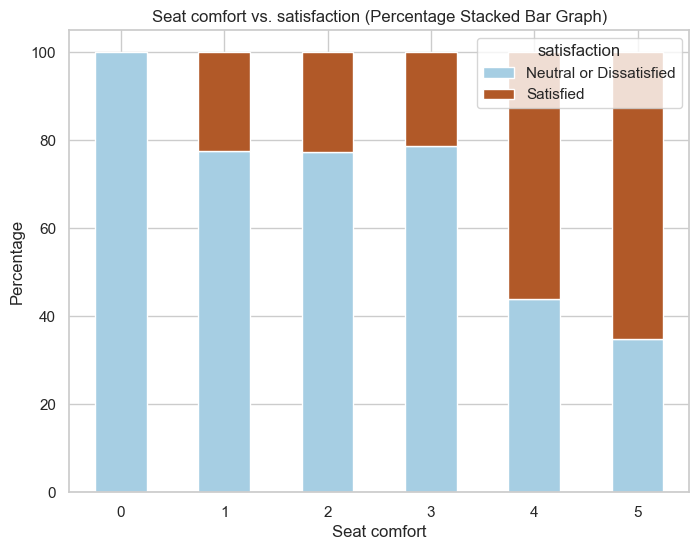

satisfaction            neutral or dissatisfied  satisfied
Inflight entertainment                                    
0                                    100.000000        NaN
1                                     85.805423  14.194577
2                                     78.732702  21.267298
3                                     72.684642  27.315358
4                                     38.887228  61.112772
5                                     34.938499  65.061501


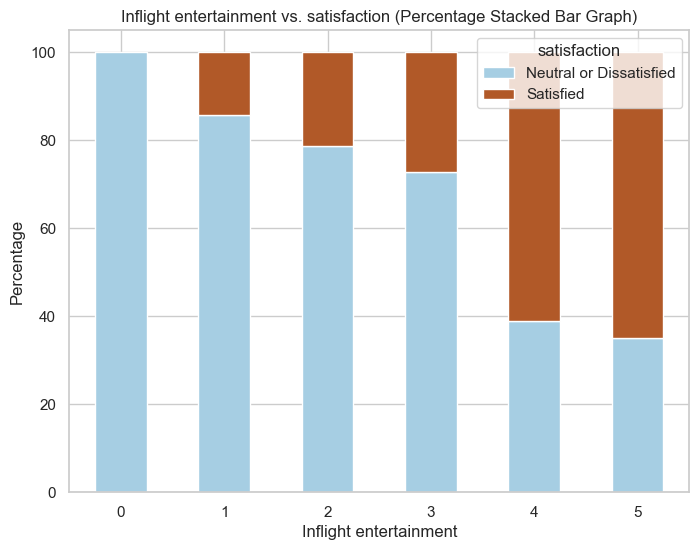

satisfaction      neutral or dissatisfied  satisfied
On-board service                                    
0                              100.000000        NaN
1                               80.334077  19.665923
2                               74.453708  25.546292
3                               68.190736  31.809264
4                               46.541612  53.458388
5                               35.362132  64.637868


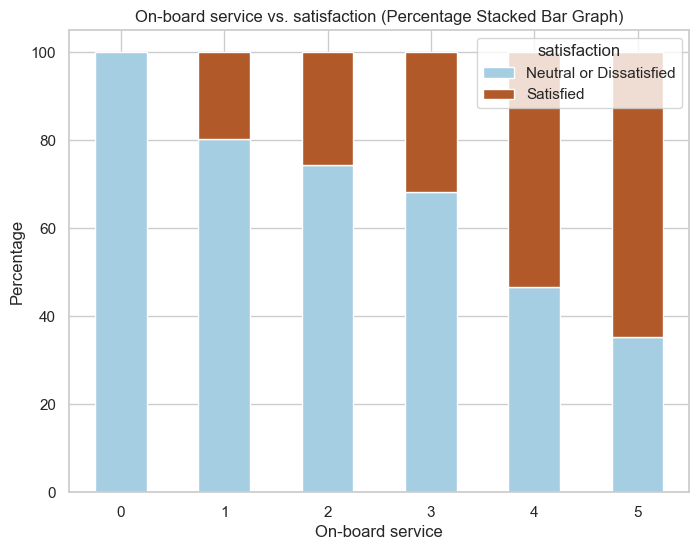

satisfaction      neutral or dissatisfied  satisfied
Leg room service                                    
0                               65.551839  34.448161
1                               79.588988  20.411012
2                               72.473513  27.526487
3                               72.393838  27.606162
4                               41.690353  58.309647
5                               38.543925  61.456075


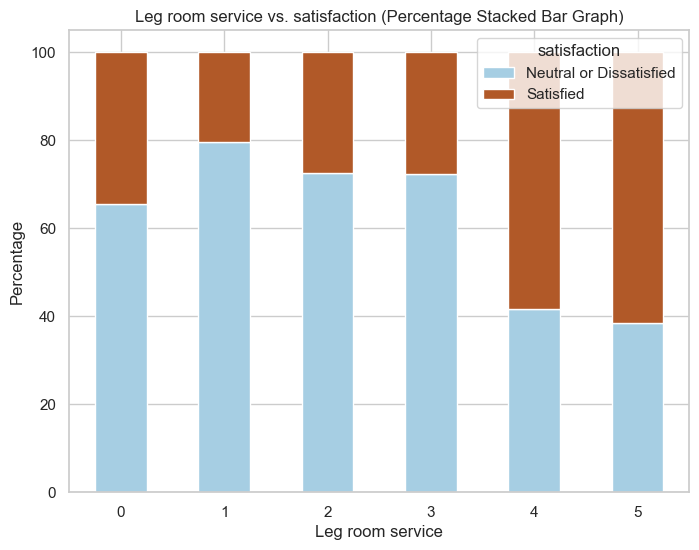

satisfaction      neutral or dissatisfied  satisfied
Baggage handling                                    
1                               69.971201  30.028799
2                               70.589054  29.410946
3                               76.202081  23.797919
4                               51.936443  48.063557
5                               38.408407  61.591593


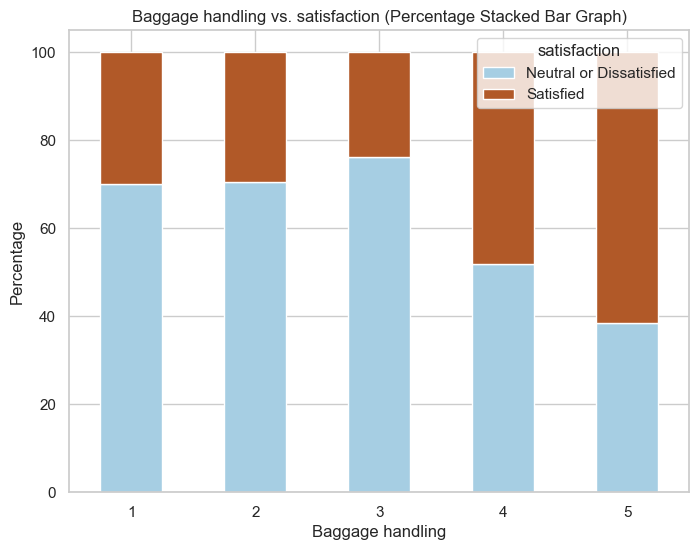

satisfaction     neutral or dissatisfied  satisfied
Checkin service                                    
0                             100.000000        NaN
1                              76.042960  23.957040
2                              74.909949  25.090051
3                              54.920599  45.079401
4                              53.997743  46.002257
5                              38.828575  61.171425


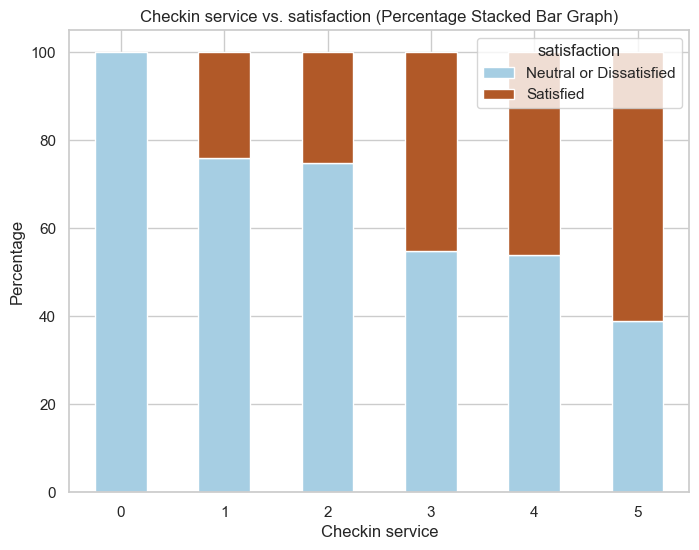

satisfaction      neutral or dissatisfied  satisfied
Inflight service                                    
0                              100.000000        NaN
1                               70.796660  29.203340
2                               69.911937  30.088063
3                               75.971717  24.028283
4                               52.175475  47.824525
5                               38.883344  61.116656


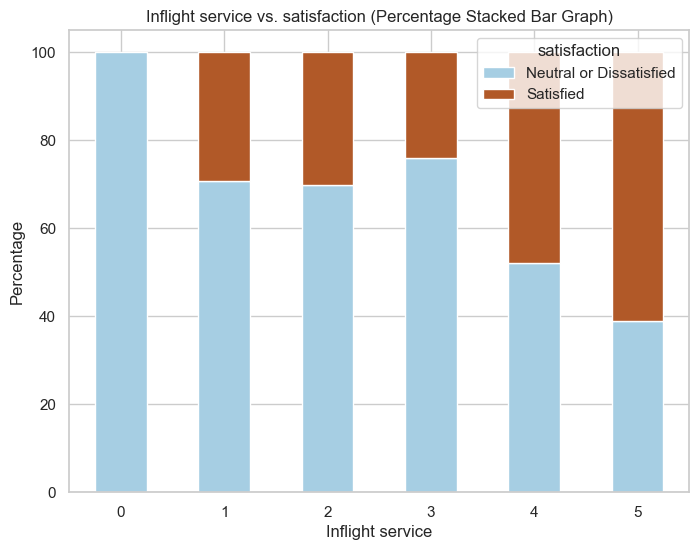

satisfaction  neutral or dissatisfied  satisfied
Cleanliness                                     
0                          100.000000        NaN
1                           80.303664  19.696336
2                           78.735146  21.264854
3                           56.692451  43.307549
4                           46.471783  53.528217
5                           38.752815  61.247185


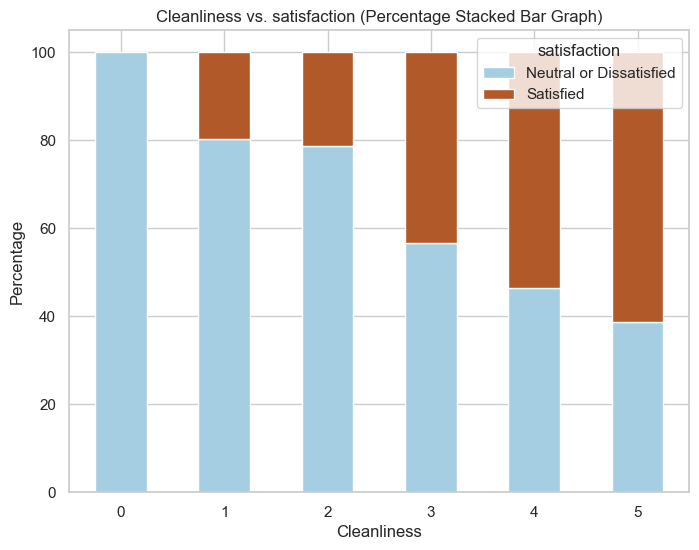

In [19]:
# Individual plots for each ordinal data column
for col in ordinal_columns:
    df[col] = df[col].astype('category')

    pct_df = df.groupby(col)['satisfaction'].value_counts(normalize=True).unstack() * 100

    print(pct_df) # Show the percentages of satisfied to dissatisfied customers

    # Plot 100% stacked bar graph with percentage fills
    sns.set(style="whitegrid")
    ax = pct_df.plot(kind='bar', stacked=True, colormap='Paired', figsize=(8, 6))
    ax.set_ylabel("Percentage")
    ax.set_title("{} vs. satisfaction (Percentage Stacked Bar Graph)".format(col))
    plt.xticks(rotation=0)
    plt.legend(title='satisfaction', labels=['Neutral or Dissatisfied', 'Satisfied'], loc='upper right')
    plt.show()

#### 3 Outcomes

satisfaction_3         dissatisfied    neutral  satisfied
Inflight wifi service                                    
0                          0.255363        NaN  99.744637
1                         63.265855   3.914368  32.819778
2                         65.751856   9.526609  24.721535
3                         56.790430  18.027031  25.182538
4                         22.349142  17.574168  60.076690
5                          0.306492   0.675676  99.017832


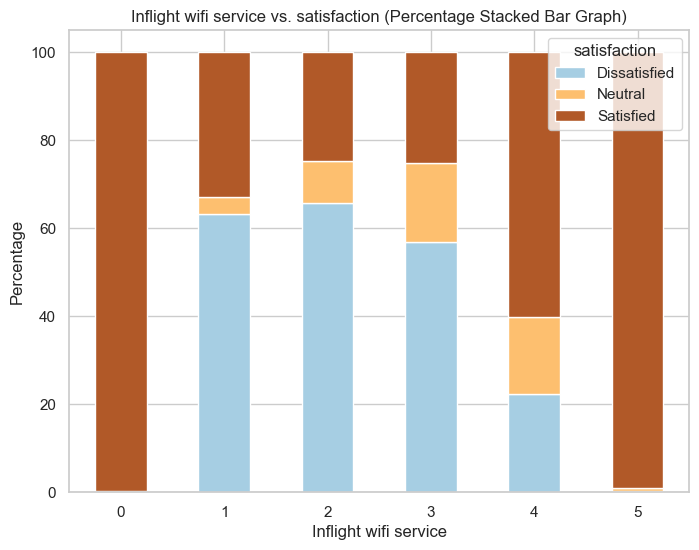

satisfaction_3                     dissatisfied    neutral  satisfied
Departure/Arrival time convenient                                    
0                                     46.385272   5.508157  48.106571
1                                     49.430676   1.530218  49.039106
2                                     51.741432   3.784713  44.473855
3                                     48.172312   7.860399  43.967289
4                                     43.949184  17.189460  38.861355
5                                     37.931281  19.597828  42.470891


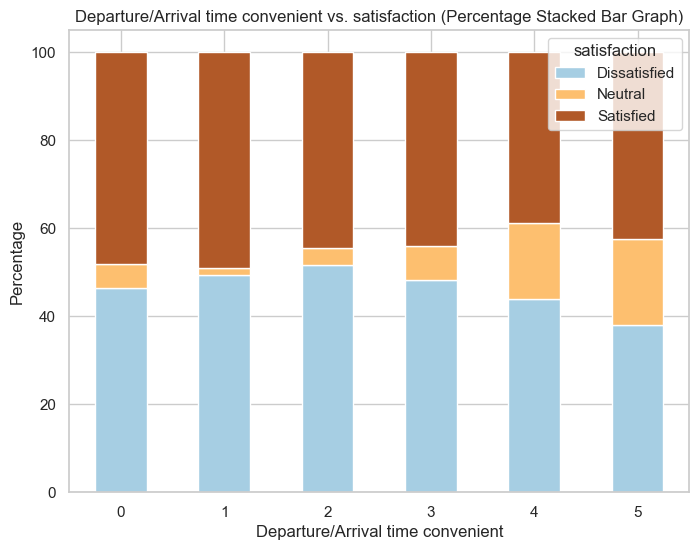

satisfaction_3          dissatisfied    neutral  satisfied
Ease of Online booking                                    
0                          31.485392   1.953537  66.561070
1                          58.621950   3.431417  37.946633
2                          60.001331   9.650261  30.348408
3                          51.297996  17.691574  31.010430
4                          31.291933  15.545737  53.162330
5                          19.260790   7.271579  73.467631


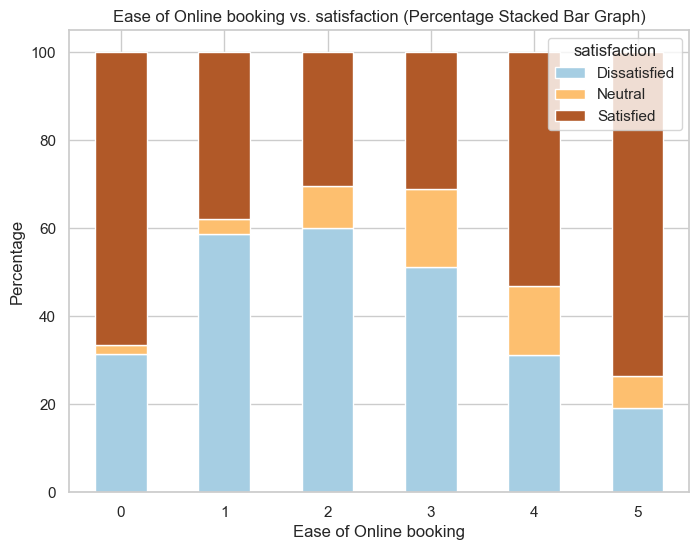

satisfaction_3  dissatisfied    neutral   satisfied
Gate location                                      
0                        NaN        NaN  100.000000
1                  42.903915   7.207494   49.888591
2                  45.707112   7.914883   46.378005
3                  53.375143  11.918694   34.706162
4                  47.590757  13.339460   39.069783
5                  29.542191  13.653857   56.803952


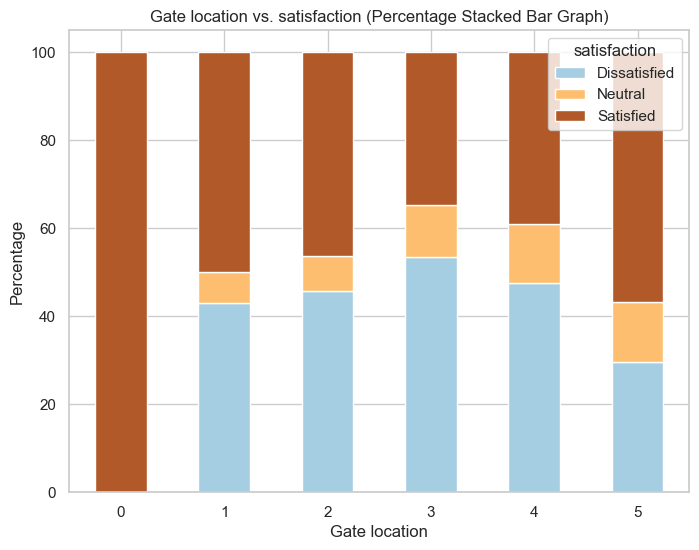

satisfaction_3  dissatisfied    neutral  satisfied
Food and drink                                    
0                  57.575758   0.757576  41.666667
1                  78.792599   1.252258  19.955143
2                  57.656210   3.443742  38.900047
3                  51.960855   8.296755  39.742390
4                  32.428099  14.988712  52.583189
5                  22.827914  22.083915  55.088171


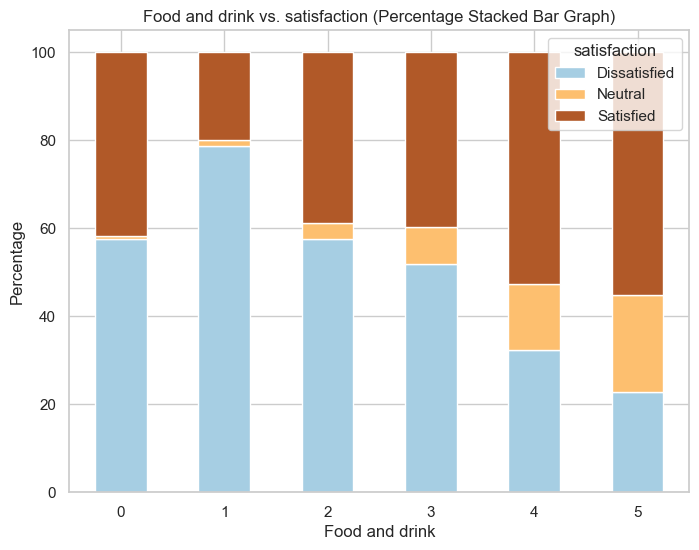

satisfaction_3   dissatisfied    neutral  satisfied
Online boarding                                    
0                   41.038961   2.500000  56.461039
1                   81.471986   4.750773  13.777242
2                   78.066016  10.481444  11.452539
3                   68.101191  18.136225  13.762584
4                   25.389934  12.308932  62.301133
5                    6.998463   5.945427  87.056111


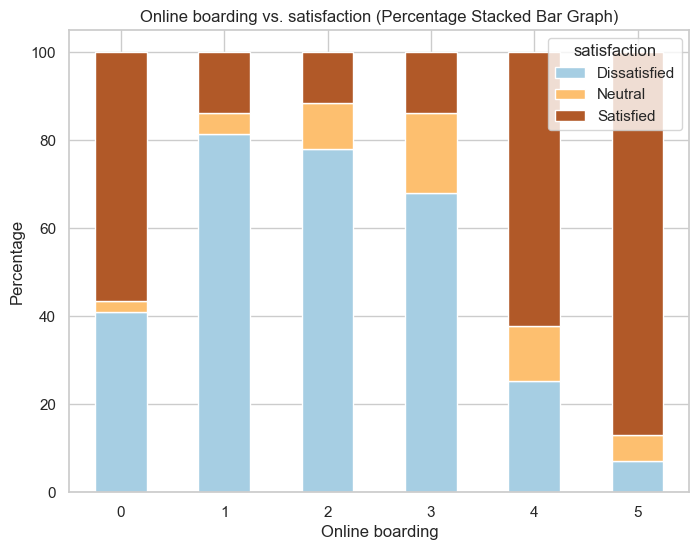

satisfaction_3  dissatisfied    neutral  satisfied
Seat comfort                                      
0                 100.000000        NaN        NaN
1                  75.522902   2.144559  22.332539
2                  73.803227   3.594366  22.602407
3                  69.367284   9.224966  21.407750
4                  31.451856  12.518865  56.029279
5                  16.508836  18.357561  65.133603


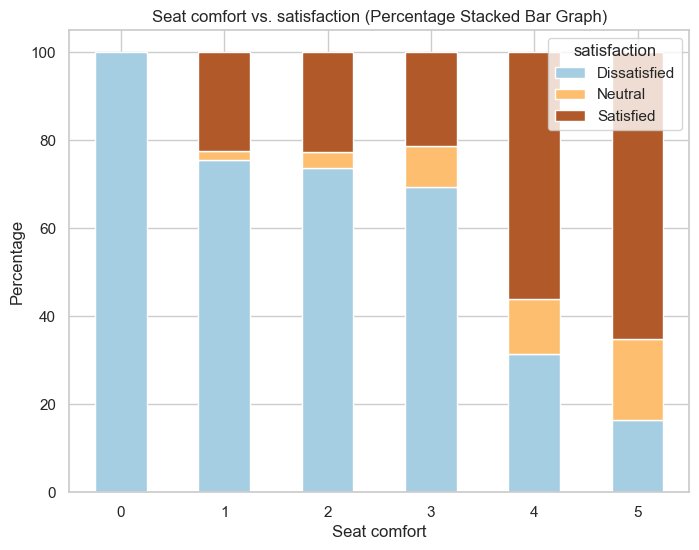

satisfaction_3          dissatisfied    neutral  satisfied
Inflight entertainment                                    
0                         100.000000        NaN        NaN
1                          85.575758   0.229665  14.194577
2                          76.925528   1.807174  21.267298
3                          63.942388   8.742254  27.315358
4                          25.193661  13.693566  61.112772
5                          13.866345  21.072153  65.061501


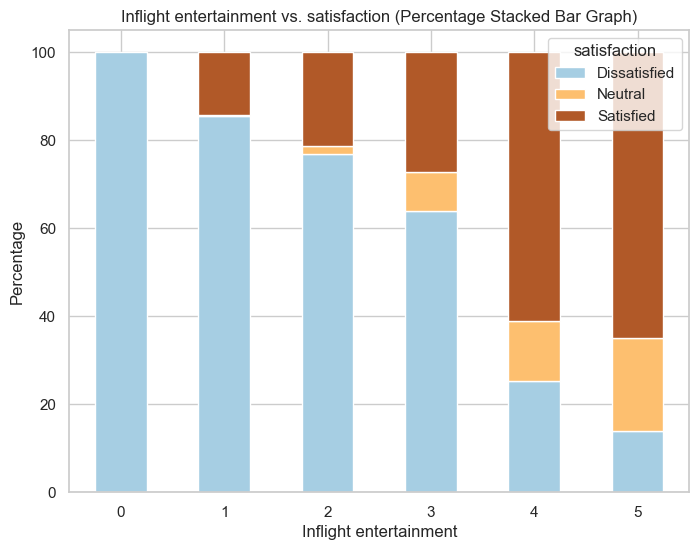

satisfaction_3    dissatisfied    neutral  satisfied
On-board service                                    
0                   100.000000        NaN        NaN
1                    76.770136   3.563941  19.665923
2                    69.750967   4.702741  25.546292
3                    55.763436  12.427300  31.809264
4                    34.033537  12.508074  53.458388
5                    20.347891  15.014241  64.637868


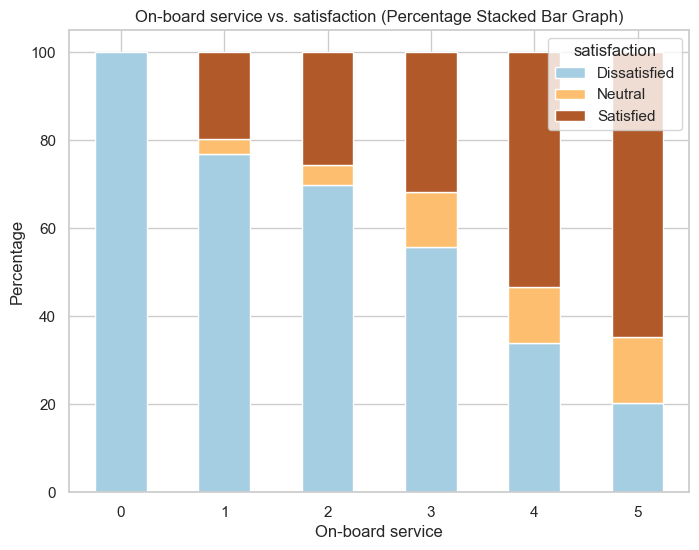

satisfaction_3    dissatisfied    neutral  satisfied
Leg room service                                    
0                    60.033445   5.518395  34.448161
1                    75.657231   3.931756  20.411012
2                    61.927465  10.546047  27.526487
3                    58.101852  14.291986  27.606162
4                    30.401828  11.288525  58.309647
5                    27.393626  11.150299  61.456075


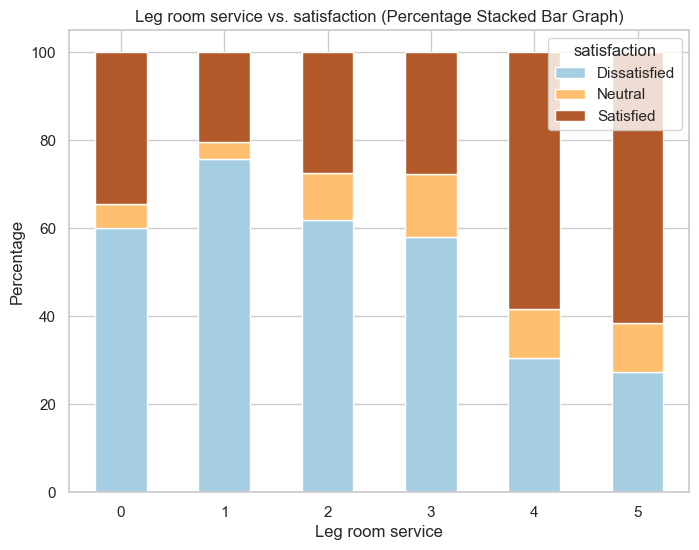

satisfaction_3    dissatisfied    neutral  satisfied
Baggage handling                                    
1                    67.523261   2.447940  30.028799
2                    67.581117   3.007938  29.410946
3                    67.885188   8.316893  23.797919
4                    38.957678  12.978764  48.063557
5                    22.663676  15.744731  61.591593


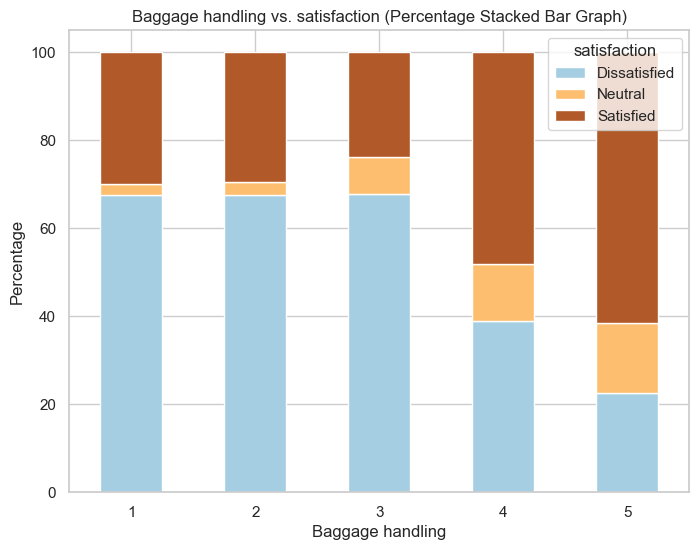

satisfaction_3   dissatisfied    neutral  satisfied
Checkin service                                    
0                  100.000000        NaN        NaN
1                   71.542091   4.500869  23.957040
2                   68.823749   6.086200  25.090051
3                   44.193721  10.726878  45.079401
4                   41.086615  12.911128  46.002257
5                   23.347371  15.481204  61.171425


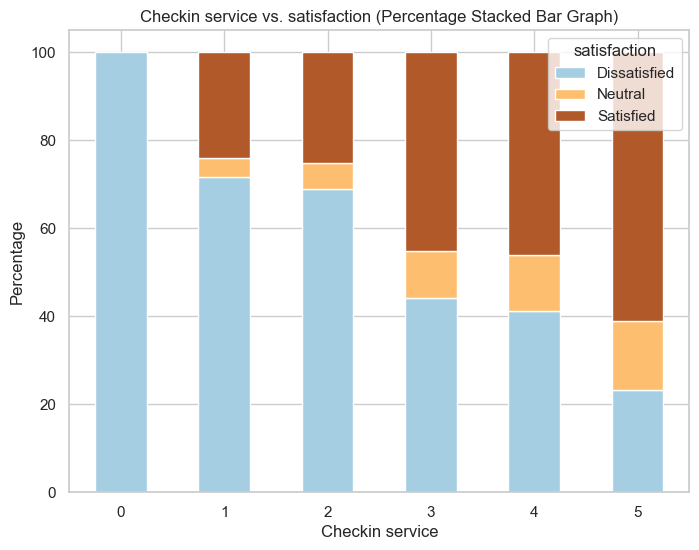

satisfaction_3    dissatisfied    neutral  satisfied
Inflight service                                    
0                   100.000000        NaN        NaN
1                    68.742947   2.053712  29.203340
2                    67.270059   2.641879  30.088063
3                    68.462632   7.509085  24.028283
4                    39.118399  13.057076  47.824525
5                    22.544472  16.338872  61.116656


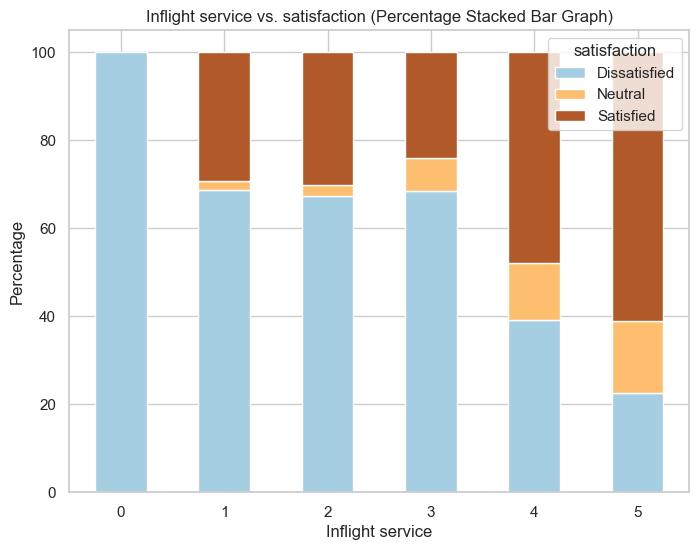

satisfaction_3  dissatisfied    neutral  satisfied
Cleanliness                                       
0                 100.000000        NaN        NaN
1                  79.173890   1.129775  19.696336
2                  75.985681   2.749466  21.264854
3                  48.784229   7.908222  43.307549
4                  32.320645  14.151138  53.528217
5                  16.814471  21.938345  61.247185


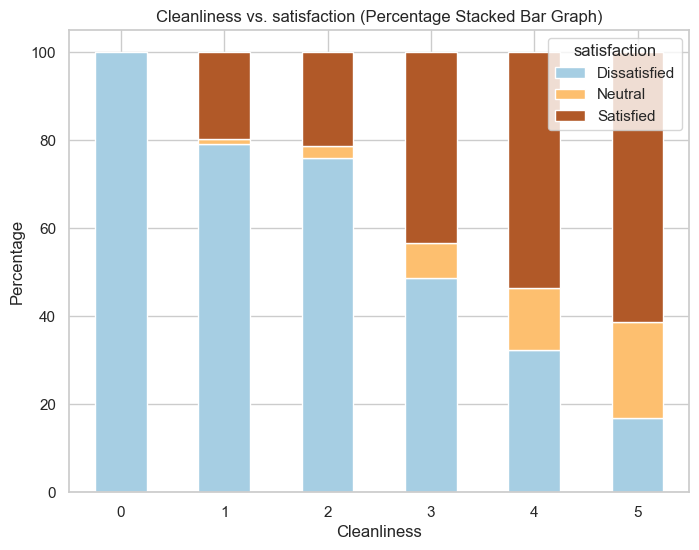

In [20]:
# Individual plots for each ordinal data column
for col in ordinal_columns:
    df[col] = df[col].astype('category')

    pct_df = df.groupby(col)['satisfaction_3'].value_counts(normalize=True).unstack() * 100

    print(pct_df) # Show the percentages of satisfied to dissatisfied customers

    # Plot 100% stacked bar graph with percentage fills
    sns.set(style="whitegrid")
    ax = pct_df.plot(kind='bar', stacked=True, colormap='Paired', figsize=(8, 6))
    ax.set_ylabel("Percentage")
    ax.set_title("{} vs. satisfaction (Percentage Stacked Bar Graph)".format(col))
    plt.xticks(rotation=0)
    plt.legend(title='satisfaction', labels=['Dissatisfied', 'Neutral', 'Satisfied'], loc='upper right')
    plt.show()